<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Why-plotly?" data-toc-modified-id="Why-plotly?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Why plotly?</a></span></li><li><span><a href="#Get-the-data" data-toc-modified-id="Get-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get the data</a></span></li><li><span><a href="#Inspect-the-data" data-toc-modified-id="Inspect-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Inspect the data</a></span></li><li><span><a href="#Add-region-to-the-dataframe" data-toc-modified-id="Add-region-to-the-dataframe-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Add region to the dataframe</a></span></li><li><span><a href="#Create-a-summary-table" data-toc-modified-id="Create-a-summary-table-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Create a summary table</a></span></li><li><span><a href="#Use-plotly-express" data-toc-modified-id="Use-plotly-express-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Use plotly express</a></span><ul class="toc-item"><li><span><a href="#Bar-chart" data-toc-modified-id="Bar-chart-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Bar chart</a></span></li></ul></li><li><span><a href="#Use-the-high-level-interface" data-toc-modified-id="Use-the-high-level-interface-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Use the high level interface</a></span></li><li><span><a href="#Adding-More-Details" data-toc-modified-id="Adding-More-Details-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Adding More Details</a></span></li><li><span><a href="#DO-NOT-GO-PAST-HERE!!!!!" data-toc-modified-id="DO-NOT-GO-PAST-HERE!!!!!-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>DO NOT GO PAST HERE!!!!!</a></span></li></ul></div>

# Why plotly?

1. why you should use plotly and not other data visualization platforms
    - only platform w interactive and pure python and deploy to web as a web app
    - use with R, julia and a few others
    - very efficient coding
2. navigate documentation
3. share graphs with others


Express to graph objects == seaborn/pyplot to matplotlib
graph objects - build from the bottom up - define data > layout > frame

start with express and the use graph objects to further refine


https://plotly.com/python/



# Get the data

In [18]:
import pandas as pd
import numpy as np
from numpy.random import randn
import plotly.express as px
import requests
from sodapy import Socrata
import seaborn as sns



#from gapminder import gapminder
#gm = gapminder
#gm.head()

In [19]:
#client = Socrata("data.cdc.gov", None)

client = Socrata('data.cdc.gov',
                  'cGQ7A3af5QfCgIY9vYgX0uFaZ',
                  username="james_cody@mail.harvard.edu",
                  password="RideaBike2021!")

#results = client.get("8xkx-amqh", limit = 100000)
results = client.get("unsk-b7fc", limit = 150000)
vaccines = pd.DataFrame(results)



# https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-County/8xkx-amqh
# https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-Jurisdi/unsk-b7fc

In [20]:
v2 = vaccines
v2.shape

(21272, 69)

In [21]:
# Drop columns
drop_columns = {'distributed_janssen',
    'distributed_moderna', 
    'distributed_pfizer', 
    'distributed_unk_manuf',
    'administered_janssen', 
    'administered_moderna',
    'administered_pfizer', 
    'administered_unk_manuf', 
    'admin_per_100k',
    'series_complete_janssen', 
    'series_complete_moderna',
    'series_complete_pfizer', 
    'series_complete_unk_manuf',
    'series_complete_janssen_12plus', 
    'series_complete_moderna_12plus',
    'series_complete_pfizer_12plus', 
    'series_complete_unk_manuf_1',
    'series_complete_janssen_18plus', 
    'series_complete_moderna_18plus',
    'series_complete_pfizer_18plus', 
    'series_complete_unk_manuf_2',
    'series_complete_janssen_65plus', 
    'series_complete_moderna_65plus',
    'series_complete_pfizer_65plus', 
    'series_complete_unk_manuf_3',
    'additional_doses_moderna', 
    'additional_doses_pfizer',
    'additional_doses_janssen', 
    'additional_doses_unk_manuf',
    'additional_doses',
    'additional_doses_18plus',
    'additional_doses_50plus',
    'additional_doses_50plus', 
    'administered_dose1_recip', 
    'administered_dose1_recip_1', 
    'administered_dose1_recip_2',
    'administered_dose1_recip_3', 
    'administered_dose1_recip_4',
    'administered_dose1_recip_5', 
    'administered_dose1_recip_6',
    'additional_doses_vax_pct',
    'additional_doses_18plus_vax_pct', 
    'additional_doses_50plus_vax_pct',
    'additional_doses_65plus', 
    'additional_doses_65plus_vax_pct'}
v2 = v2.drop(columns = drop_columns)

In [22]:
v2['date'] = v2['date'].astype('datetime64[ns]')

In [23]:
v2['distributed'] = pd.to_numeric(v2['distributed']).astype(int)
v2['dist_per_100k'] = pd.to_numeric(v2['dist_per_100k']).astype(int)
v2['distributed_per_100k_12plus'] = pd.to_numeric(v2['distributed_per_100k_12plus']).astype(int)
v2['distributed_per_100k_18plus'] = pd.to_numeric(v2['distributed_per_100k_18plus']).astype(int)
v2['distributed_per_100k_65plus'] = pd.to_numeric(v2['distributed_per_100k_65plus']).astype(int)
v2['administered'] = pd.to_numeric(v2['administered']).astype(int)
v2['administered_12plus'] = pd.to_numeric(v2['administered_12plus']).astype(int)
v2['administered_18plus'] = pd.to_numeric(v2['administered_18plus']).astype(int)
v2['administered_65plus'] = pd.to_numeric(v2['administered_65plus']).astype(int)
v2['admin_per_100k_12plus'] = pd.to_numeric(v2['admin_per_100k_12plus']).astype(int)
v2['admin_per_100k_18plus'] = pd.to_numeric(v2['admin_per_100k_18plus']).astype(int)
v2['admin_per_100k_65plus'] = pd.to_numeric(v2['admin_per_100k_65plus']).astype(int)
v2['recip_administered'] = pd.to_numeric(v2['recip_administered']).astype(int)
v2['series_complete_yes'] = pd.to_numeric(v2['series_complete_yes']).astype(int)
v2['series_complete_12plus'] = pd.to_numeric(v2['series_complete_12plus']).astype(int)
v2['series_complete_18plus'] = pd.to_numeric(v2['series_complete_18plus']).astype(int)
v2['series_complete_65plus'] = pd.to_numeric(v2['series_complete_65plus']).astype(int)

In [24]:
v2['administered_dose1_pop_pct'] = pd.to_numeric(v2['administered_dose1_pop_pct']).astype(float)
v2['series_complete_pop_pct'] = pd.to_numeric(v2['series_complete_pop_pct']).astype(float)
v2['series_complete_12pluspop'] = pd.to_numeric(v2['series_complete_12pluspop']).astype(float)
v2['series_complete_18pluspop'] = pd.to_numeric(v2['series_complete_18pluspop']).astype(float)
v2['series_complete_65pluspop'] = pd.to_numeric(v2['series_complete_65pluspop']).astype(float)

In [25]:
v2.shape

(21272, 25)

In [26]:
v2.columns

Index(['date', 'mmwr_week', 'location', 'distributed', 'dist_per_100k',
       'distributed_per_100k_12plus', 'distributed_per_100k_18plus',
       'distributed_per_100k_65plus', 'administered', 'administered_12plus',
       'administered_18plus', 'administered_65plus', 'admin_per_100k_12plus',
       'admin_per_100k_18plus', 'admin_per_100k_65plus', 'recip_administered',
       'administered_dose1_pop_pct', 'series_complete_yes',
       'series_complete_pop_pct', 'series_complete_12plus',
       'series_complete_12pluspop', 'series_complete_18plus',
       'series_complete_18pluspop', 'series_complete_65plus',
       'series_complete_65pluspop'],
      dtype='object')

In [27]:
v2 = v2.query("date.dt.month > 9 and date.dt.year == 2021")

In [28]:
v2.shape

(2389, 25)

In [29]:
v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2389 entries, 0 to 2388
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         2389 non-null   datetime64[ns]
 1   mmwr_week                    2389 non-null   object        
 2   location                     2389 non-null   object        
 3   distributed                  2389 non-null   int64         
 4   dist_per_100k                2389 non-null   int64         
 5   distributed_per_100k_12plus  2389 non-null   int64         
 6   distributed_per_100k_18plus  2389 non-null   int64         
 7   distributed_per_100k_65plus  2389 non-null   int64         
 8   administered                 2389 non-null   int64         
 9   administered_12plus          2389 non-null   int64         
 10  administered_18plus          2389 non-null   int64         
 11  administered_65plus          2389 non-null 

# Inspect the data

In [30]:
# checking for duplicates
v2.loc[v2.duplicated()]

Empty DataFrame
Columns: [date, mmwr_week, location, distributed, dist_per_100k, distributed_per_100k_12plus, distributed_per_100k_18plus, distributed_per_100k_65plus, administered, administered_12plus, administered_18plus, administered_65plus, admin_per_100k_12plus, admin_per_100k_18plus, admin_per_100k_65plus, recip_administered, administered_dose1_pop_pct, series_complete_yes, series_complete_pop_pct, series_complete_12plus, series_complete_12pluspop, series_complete_18plus, series_complete_18pluspop, series_complete_65plus, series_complete_65pluspop]
Index: []

[0 rows x 25 columns]

In [31]:
# Just listing the columns and how many rows 
# for each have a missing value.

v2.isnull().sum()

date                           0
mmwr_week                      0
location                       0
distributed                    0
dist_per_100k                  0
distributed_per_100k_12plus    0
distributed_per_100k_18plus    0
distributed_per_100k_65plus    0
administered                   0
administered_12plus            0
administered_18plus            0
administered_65plus            0
admin_per_100k_12plus          0
admin_per_100k_18plus          0
admin_per_100k_65plus          0
recip_administered             0
administered_dose1_pop_pct     0
series_complete_yes            0
series_complete_pop_pct        0
series_complete_12plus         0
series_complete_12pluspop      0
series_complete_18plus         0
series_complete_18pluspop      0
series_complete_65plus         0
series_complete_65pluspop      0
dtype: int64

In [32]:
df_null = v2.isna().mean().round(4) * 100
df_null.sort_values(ascending=False).head()

date                         0.0
admin_per_100k_18plus        0.0
series_complete_65plus       0.0
series_complete_18pluspop    0.0
series_complete_18plus       0.0
dtype: float64

# Add region to the dataframe

In [33]:
states = pd.read_csv('/Users/jimcody/Documents/2021Python/Plotly-Dash/data/us-map-data.csv')

In [34]:
states.shape

(58, 4)

In [35]:
states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          58 non-null     object
 1   Abbreviation  58 non-null     object
 2   Code          58 non-null     int64 
 3   Region        58 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.9+ KB


In [36]:
states.head()

Name Abbreviation  Code     Region
0         Alabama           AL    11  Southeast
1          Alaska           AK    12       West
2  American Samoa           AS    13       West
3         Arizona           AZ    10     Plains
4        Arkansas           AR    14  Southeast

In [37]:
v3 = pd.merge(v2,states, left_on = 'location', right_on = 'Abbreviation', )
v3 = v3.drop(columns = ['Abbreviation', 'Code'])

In [38]:
v3.head()

date mmwr_week location  distributed  dist_per_100k  \
0 2021-11-06        44       IN      9416220         139868   
1 2021-11-05        44       IN      9388660         139459   
2 2021-11-04        44       IN      9352340         138919   
3 2021-11-03        44       IN      9247420         137361   
4 2021-11-02        44       IN      9161020         136077   

   distributed_per_100k_12plus  distributed_per_100k_18plus  \
0                       165051                       182335   
1                       164568                       181801   
2                       163931                       181098   
3                       162092                       179066   
4                       160578                       177393   

   distributed_per_100k_65plus  administered  administered_12plus  ...  \
0                       867260       7343063              7340217  ...   
1                       864722       7326180              7324542  ...   
2                       861377       7308293              7307794  ...   
3                       851714       7285948              7285450  ...   
4                       843756       7269788              7269290  ...   

   series_complete_yes  series_complete_pop_pct  series_complete_12plus  \
0              3367322                     50.0                 3367136   
1              3365638                     50.0                 3365477   
2              3364015                     50.0                 3363854   
3              3361619                     49.9                 3361458   
4              3359829                     49.9                 3359668   

   series_complete_12pluspop  series_complete_18plus  \
0                       59.0                 3173510   
1                       59.0                 3172019   
2                       59.0                 3170536   
3                       58.9                 3168350   
4                       58.9                 3166719   

   series_complete_18pluspop  series_complete_65plus  \
0                       61.5                  921068   
1                       61.4                  920860   
2                       61.4                  920651   
3                       61.4                  920356   
4                       61.3                  920115   

   series_complete_65pluspop     Name   Region  
0                       84.8  Indiana  Midwest  
1                       84.8  Indiana  Midwest  
2                       84.8  Indiana  Midwest  
3                       84.8  Indiana  Midwest  
4                       84.7  Indiana  Midwest  

[5 rows x 27 columns]

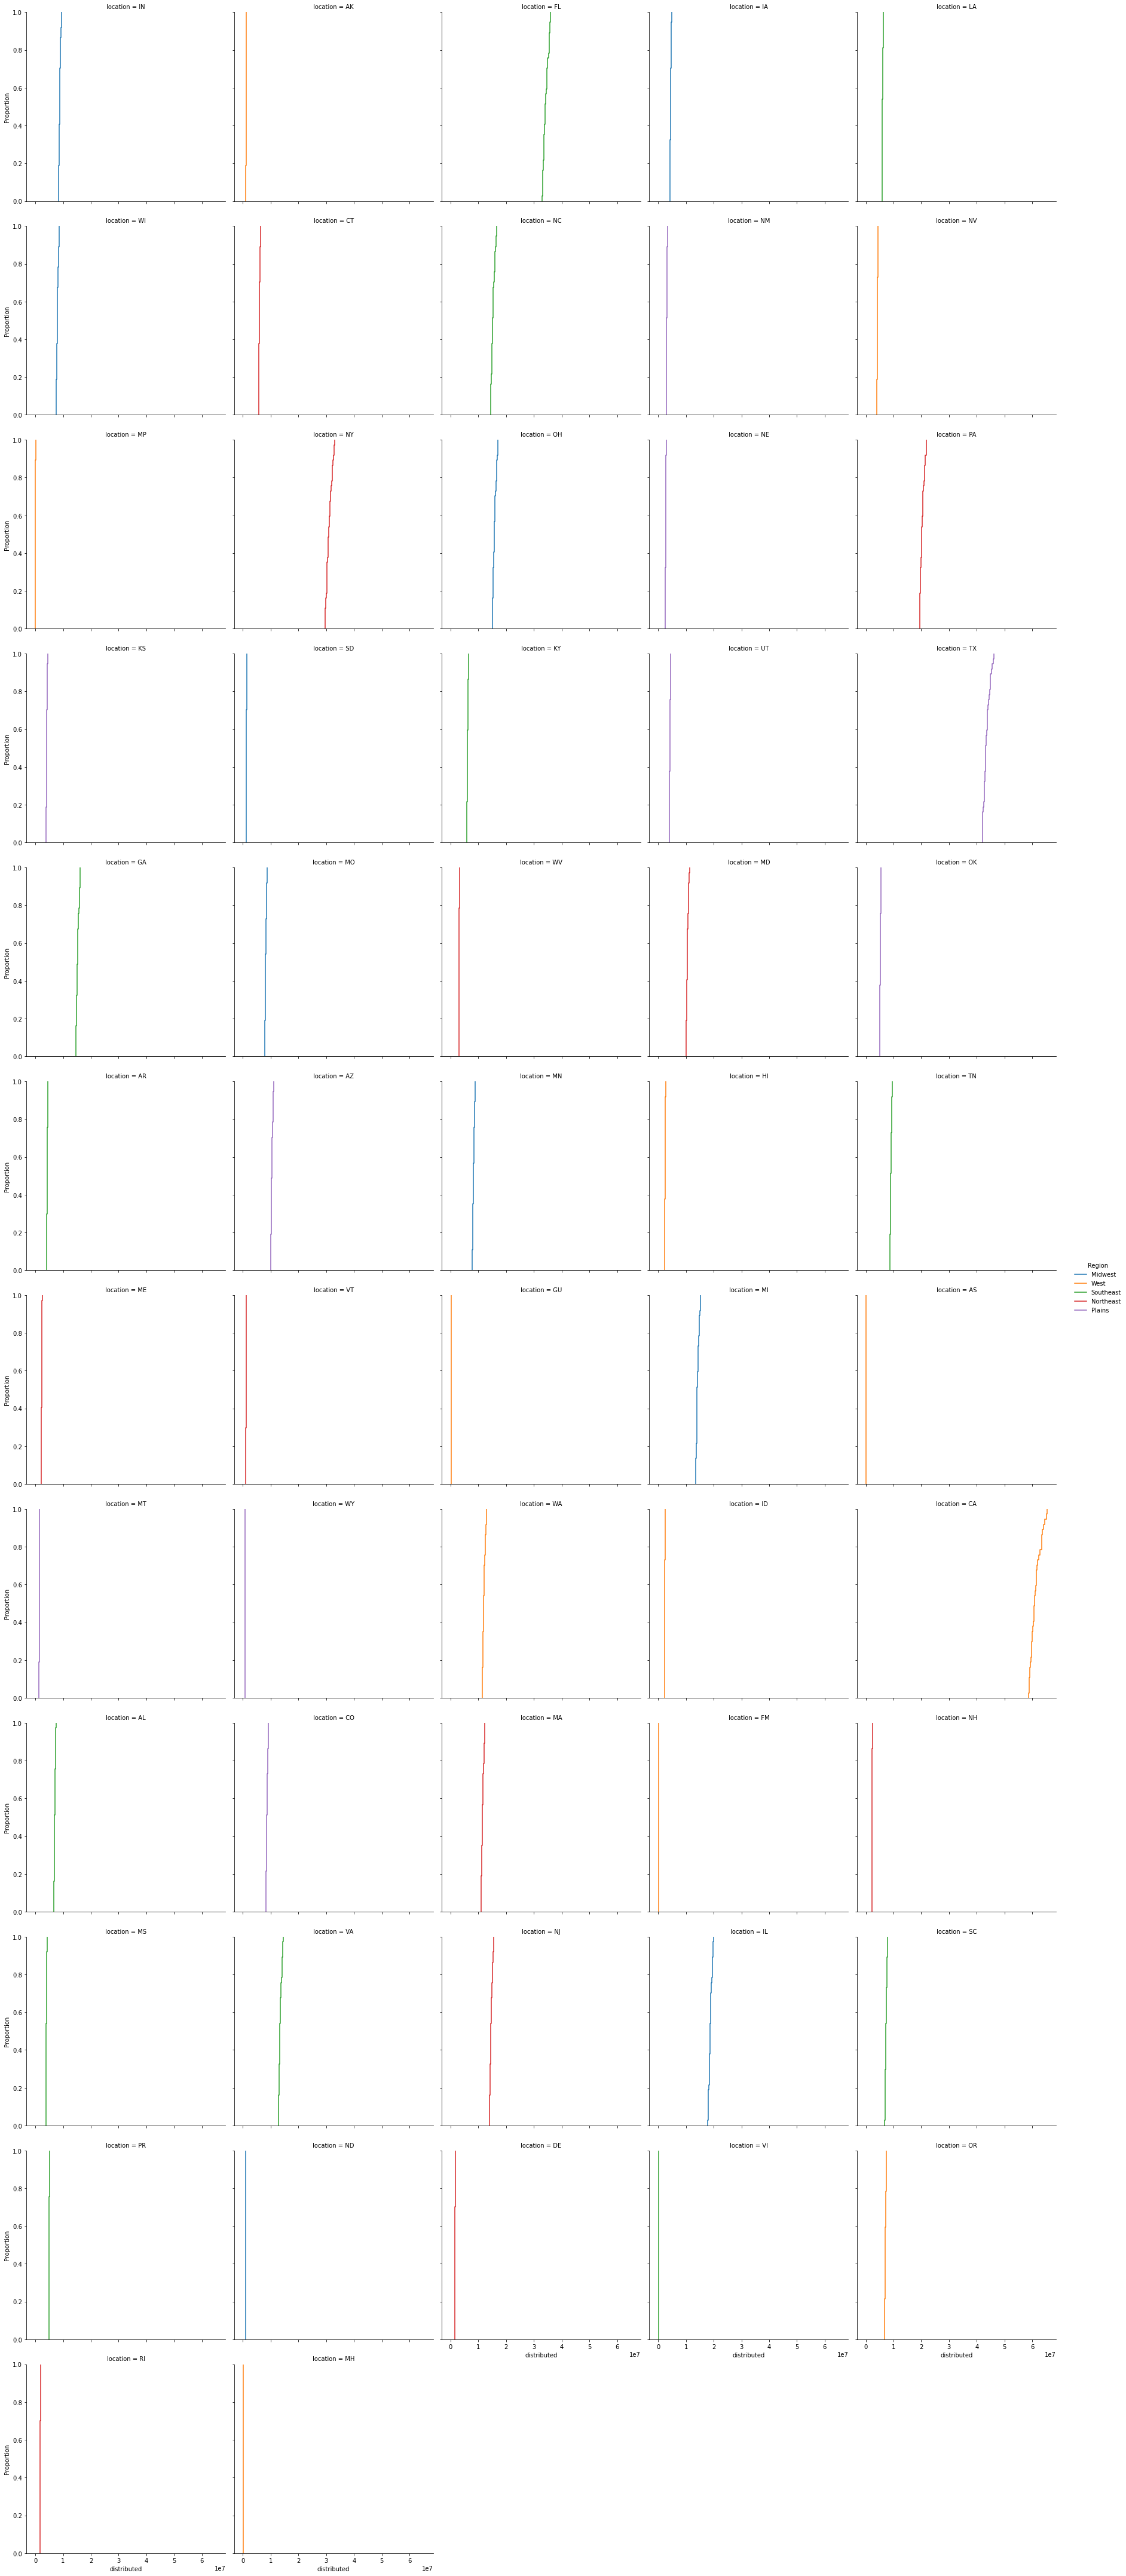

In [39]:
sns.displot(data=v3, x="distributed", hue="Region", col="location", kind = 'ecdf', col_wrap = 5)

# Create a summary table

In [40]:
vac_summary = v3.groupby(['Region','location']).sum().reset_index()
vac_summary.shape

(57, 24)

In [41]:
vac_summary.head()

Region location  distributed  dist_per_100k  distributed_per_100k_12plus  \
0  Midwest       IA    166536585        5278379                      6222686   
1  Midwest       IL    695761965        5490621                      6419769   
2  Midwest       IN    325301880        4832014                      5702011   
3  Midwest       MI    525891960        5265840                      6118581   
4  Midwest       MN    307016060        5443901                      6425500   

   distributed_per_100k_18plus  distributed_per_100k_65plus  administered  \
0                      6858355                     30117618     133776973   
1                      7060748                     34052025     584315274   
2                      6299117                     29961225     260468191   
3                      6705304                     29788810     412576379   
4                      7079849                     33357459     259076418   

   administered_12plus  administered_18plus  ...  recip_administered  \
0            133773770            125549671  ...           133649639   
1            582781253            541162131  ...           590433495   
2            260446711            245123288  ...           259491209   
3            412555224            388816346  ...           418991391   
4            258349795            240293809  ...           259619009   

   administered_dose1_pop_pct  series_complete_yes  series_complete_pop_pct  \
0                      2184.2             64155110                   2033.2   
1                      2532.1            261373401                   2062.4   
2                      1967.5            122874998                   1825.2   
3                      2135.0            196001562                   1962.8   
4                      2387.6            123805929                   2195.3   

   series_complete_12plus  series_complete_12pluspop  series_complete_18plus  \
0                64154114                     2397.0                60329514   
1               260814562                     2406.3               242784634   
2               122869216                     2153.6               115879440   
3               195996929                     2280.4               184932921   
4               123505896                     2584.7               114859008   

   series_complete_18pluspop  series_complete_65plus  \
0                     2484.6                18257326   
1                     2464.1                60874362   
2                     2244.1                33896689   
3                     2357.9                55078578   
4                     2648.9                31012718   

   series_complete_65pluspop  
0                     3301.8  
1                     2979.5  
2                     3122.0  
3                     3119.8  
4                     3369.3  

[5 rows x 24 columns]

# Use plotly express

## Bar chart

In [42]:

fig = px.bar(vac_summary, x='location', y='distributed', color = 'Region')
fig.show()

# Provides some built-in interaction.  
# plots each individual row(oberservation).  No aggregation is occurring.

In [43]:
# Exercise 1
# Use the plotly documentation to create a pie chart. 


# First line is not needed
#import plotly.express as px
df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
fig = px.pie(df, values='pop', names='country', title='Population of European continent')
fig.show()

# Use the high level interface

https://plotly.com/python-api-reference/plotly.express.html

For when we want to ad more attributes than is in the sample code.

In [44]:
gm.head()

NameError: name 'gm' is not defined

In [ ]:
# Adding additional attributes

data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(data_canada, x='year', y='pop', color = 'year', title = 'Canada/s Population 1950 - 2007')
fig.show()

# Adding More Details
Working with plotly graph objects

https://plotly.com/python/reference/index/

Traces > Update Traces   Traces represents the data that goes inside the layout

Layout > Update Layout   Layout represents the charts > ticks, hover, legend

# DO NOT GO PAST HERE!!!!!

In [ ]:
nums = ['distributed', 
       'dist_per_100k',
       'distributed_per_100k_12plus', 
       'distributed_per_100k_18plus',
       'distributed_per_100k_65plus', 
       'administered', 
       'administered_12plus',
       'administered_18plus', 
       'administered_65plus', 
       'admin_per_100k_12plus',
       'admin_per_100k_18plus', 
       'admin_per_100k_65plus', 
       'recip_administered',
       'administered_dose1_recip', 
       'administered_dose1_recip_1', 
       'administered_dose1_recip_2',
       'administered_dose1_recip_3', 
       'administered_dose1_recip_4',
       'administered_dose1_recip_5', 
       'administered_dose1_recip_6',
       'series_complete_yes', 
       'series_complete_12plus', 
       'series_complete_18plus', 
       'series_complete_65plus', 
       'additional_doses', 
       'additional_doses_18plus', 
       'additional_doses_50plus', 
       'additional_doses_65plus']

In [ ]:
flts = ['administered_dose1_pop_pct',
       'series_complete_pop_pct',
       'series_complete_12pluspop',
       'series_complete_18pluspop',
       'series_complete_65pluspop',
       'additional_doses_vax_pct',
       'additional_doses_18plus_vax_pct',
       'additional_doses_50plus_vax_pct',
       'additional_doses_65plus_vax_pct']